In [1]:
import load_data
import numpy as np
from PIL import Image
from os.path import join
from os import makedirs

In [2]:
train_img = load_data.load_images_in_path2("../AerialImageDataset/train/images")
train_gt = load_data.load_images_in_path2("../AerialImageDataset/train/gt")

In [3]:
print(len(train_img))

180


In [4]:
def dict_to_sorted_list(images):
    return sorted(images.items(), key=lambda t: t[0]) #sort by name

In [5]:
sorted_train_img = dict_to_sorted_list(train_img)
sorted_train_gt = dict_to_sorted_list(train_gt)

In [6]:
split_size = 50

In [1]:
def insert_num_img_name(name, idx, ext):
    s = name.split('.')
    return s[0] + "_" + str(idx).zfill(2) + ext

In [2]:
def split_one_image(image, split_size, ext):
    name = image[0]
    pil_img = image[1]
    np_img = np.asarray(pil_img)
    tmp1 = np.split(np_img, split_size, axis=0) # assume image is shape = (W, H, C)
    tmp2 = []
    for i in tmp1:
        tmp2 += np.split(i, split_size, axis=1)
    if len(np.array(tmp2).shape) == 5: #4 to mean RGB
        return [(insert_num_img_name(name, i, ext), np.mean(arr,axis=2)) for i, arr in enumerate(tmp2)]
    else: return [(insert_num_img_name(name, i, ext), arr) for i, arr in enumerate(tmp2)]

In [9]:
imgs = split_one_image(sorted_train_img[0], split_size)
gts = split_one_image(sorted_train_gt[0], split_size)

## Test

In [10]:
from matplotlib.pyplot import imshow

255


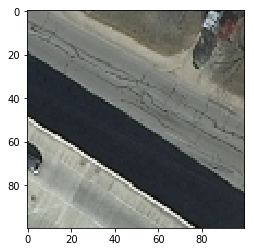

In [11]:
imshow(imgs[0][1])
fst_img=imgs[0][1]
print(fst_img.max())
Image.fromarray(fst_img).convert('L').save("tmp_img.jpg","JPEG",optimize=True)

(100, 100)


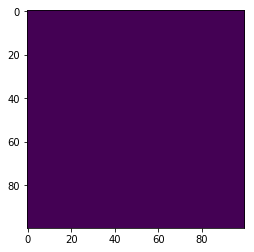

In [12]:
imshow(gts[0][1])
print(gts[0][1].shape)
fst_gt=gts[0][1]
Image.fromarray(fst_gt).save("tmp_gt.jpg", "JPEG")

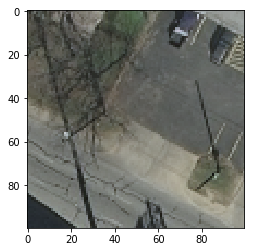

In [13]:
imshow(imgs[1][1])

## Sauvegarde des nouvelles images

In [17]:
def save_files(path, to_save):
    for n,img in to_save:
        #Image.fromarray(img).convert('L').save(join(path,n)) # Grayscale
        Image.fromarray(img).save(join(path,n)) #RGB

def save_gt(path, to_save):
    for n,img in to_save:
        Image.fromarray(img).convert('L').save(join(path,n)) # Grayscale

In [3]:
def split_save_imgs(path, img_tuple_list, split_size, num_splits, batch):
    res = []
    data_tosplit = int(len(img_tuple_list)/num_splits)
    index = [batch * data_tosplit, min(len(img_tuple_list), (batch + 1) * data_tosplit)]
    print(data_tosplit)
    print(index)
    for j in range(index[0], index[1]):
        save_files(path, split_one_image(img_tuple_list[j], split_size, ".jpg"))
        
def split_save_gt(path, img_tuple_list, split_size, num_splits, batch):
    res = []
    data_tosplit = int(len(img_tuple_list)/num_splits)
    index = [batch * data_tosplit, min(len(img_tuple_list), (batch + 1) * data_tosplit)]
    print(data_tosplit)
    print(index)
    for j in range(index[0], index[1]):
        save_gt(path, split_one_image(img_tuple_list[j], split_size, ".png"))

In [22]:
# dir_splitted_img = "../splitted_dataset/train/images_splitted"
dir_splitted_img = "../img_split_RGB_100by100"
# dir_splitted_gt = "../splitted_dataset/train/gt_splitted"
dir_splitted_gt = "../gt_split_100by100"

#makedirs(dir_splitted_img)
makedirs(dir_splitted_gt)

#split_save_imgs(dir_splitted_img, sorted_train_img, split_size, 5,0)
split_save_gt(dir_splitted_gt, sorted_train_gt, split_size, 5, 0)

36
[0, 36]
